In [1]:
import pandas as pd

try:
    df = pd.read_csv('creditcard.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)


Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Descriptive Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683

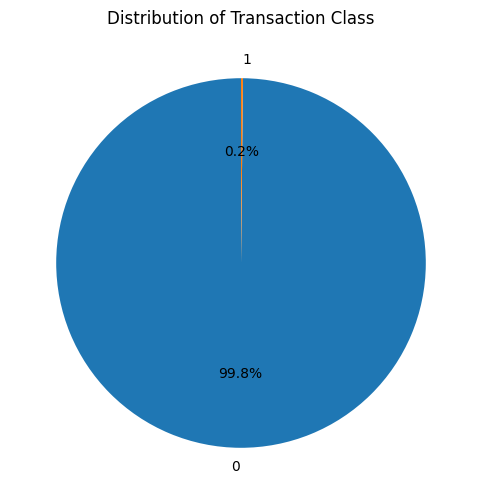

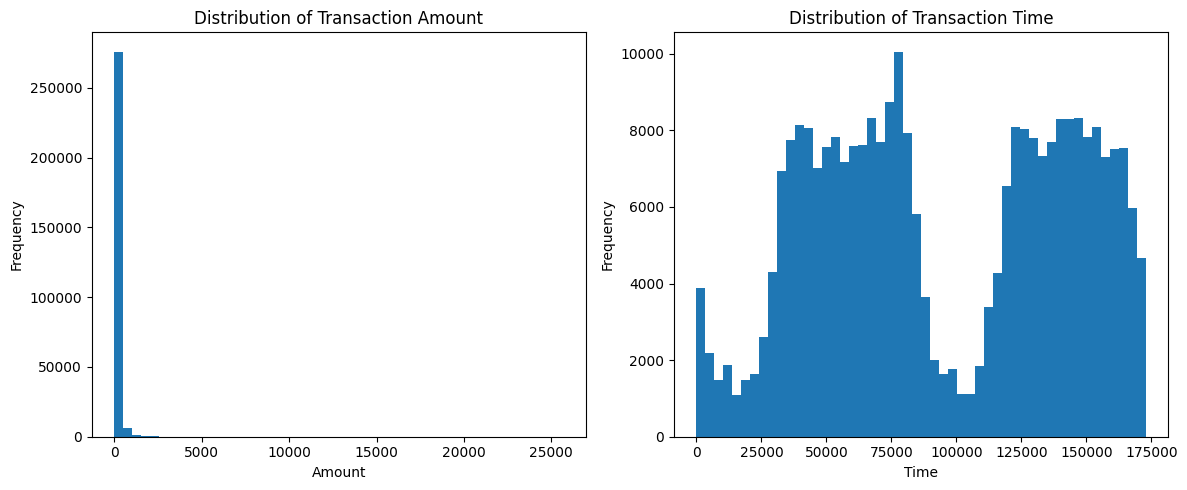

<Figure size 1200x600 with 0 Axes>

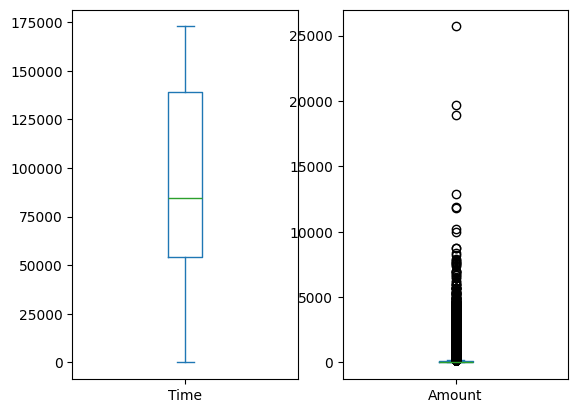


Dataset Shape: (284807, 31)


In [5]:

print("Data Types:\n", df.dtypes)
print("\nDescriptive Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())
class_counts = df['Class'].value_counts()
print("\nTarget Variable Distribution:\n", class_counts)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transaction Class')
plt.show()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
df[['Time', 'Amount']].plot(kind='box', subplots=True, layout=(1, 2), sharex=False, sharey=False)
plt.show()
print("\nDataset Shape:", df.shape)

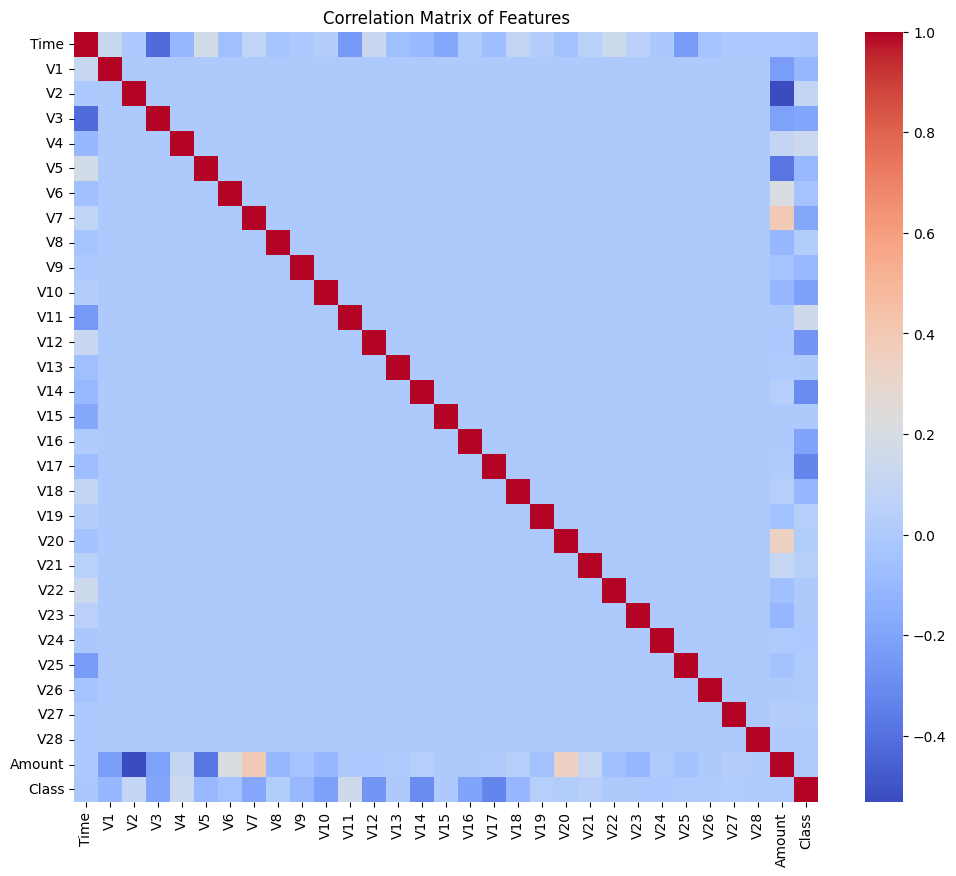

Time                               V1                      \
               mean   median           std      mean    median       std   
Class                                                                      
0      94838.202258  84711.0  47484.015786  0.008258  0.020023  1.929814   
1      80746.806911  75568.5  47835.365138 -4.771948 -2.342497  6.783687   

             V2                            V3  ...       V26       V27  \
           mean    median       std      mean  ...       std      mean   
Class                                          ...                       
0     -0.006271  0.064070  1.636146  0.012171  ...  0.482241 -0.000295   
1      3.623778  2.717869  4.291216 -7.033281  ...  0.471679  0.170575   

                                V28                          Amount         \
         median       std      mean    median       std        mean median   
Class                                                                        
0      0.001230  0.399847 -0.000131  0.011199  0.329570   88.291022  22.00   
1      0.394926  1.376766  0.075667  0.146344  0.547291  122.211321   9.25   

                   
              std  
Class              
0      250.105092  
1      256.683288  

[2 rows x 90 columns]

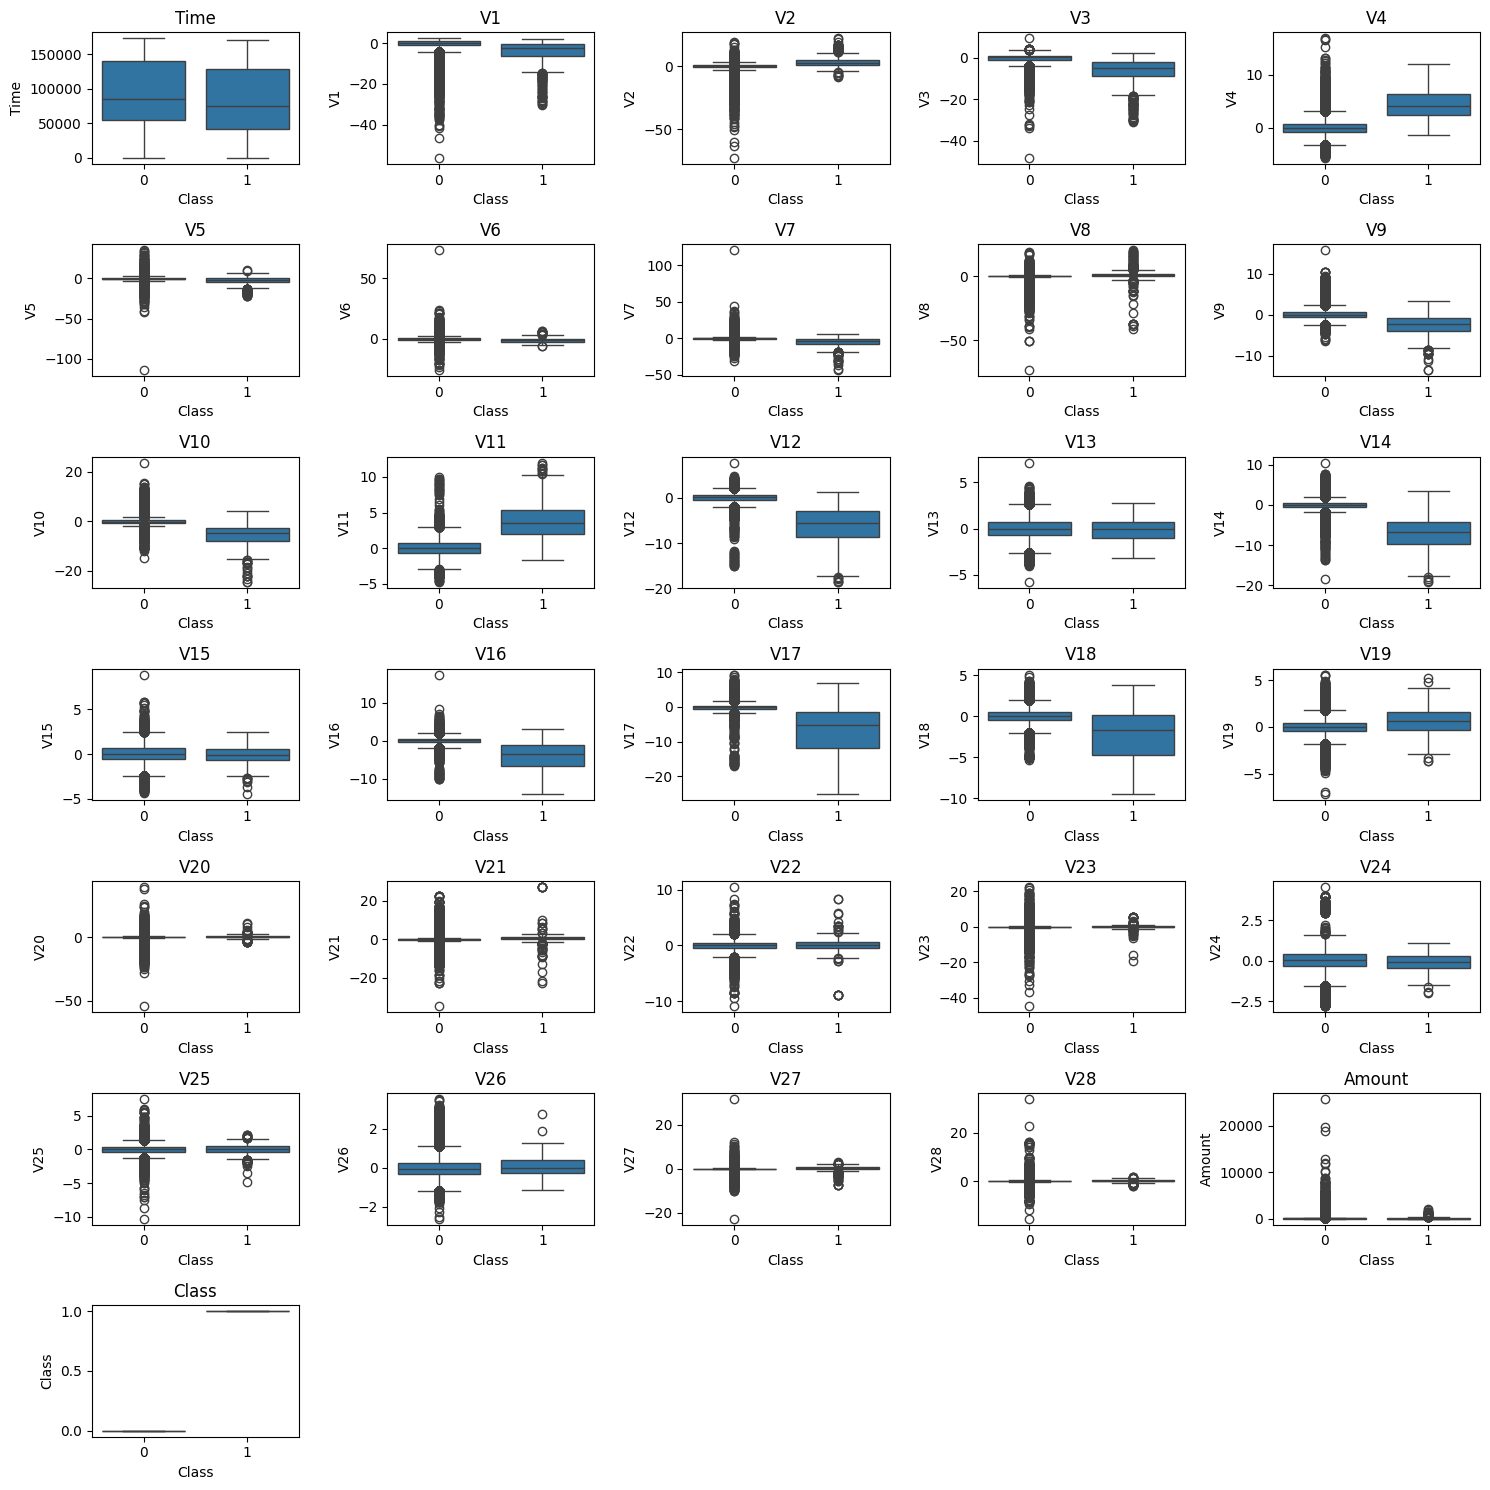

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()
class_summary = df.groupby('Class').agg(['mean', 'median', 'std'])
display(class_summary)
numerical_features = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_features):
    plt.subplot(7, 5, i + 1)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(col)
    plt.tight_layout()

plt.show()

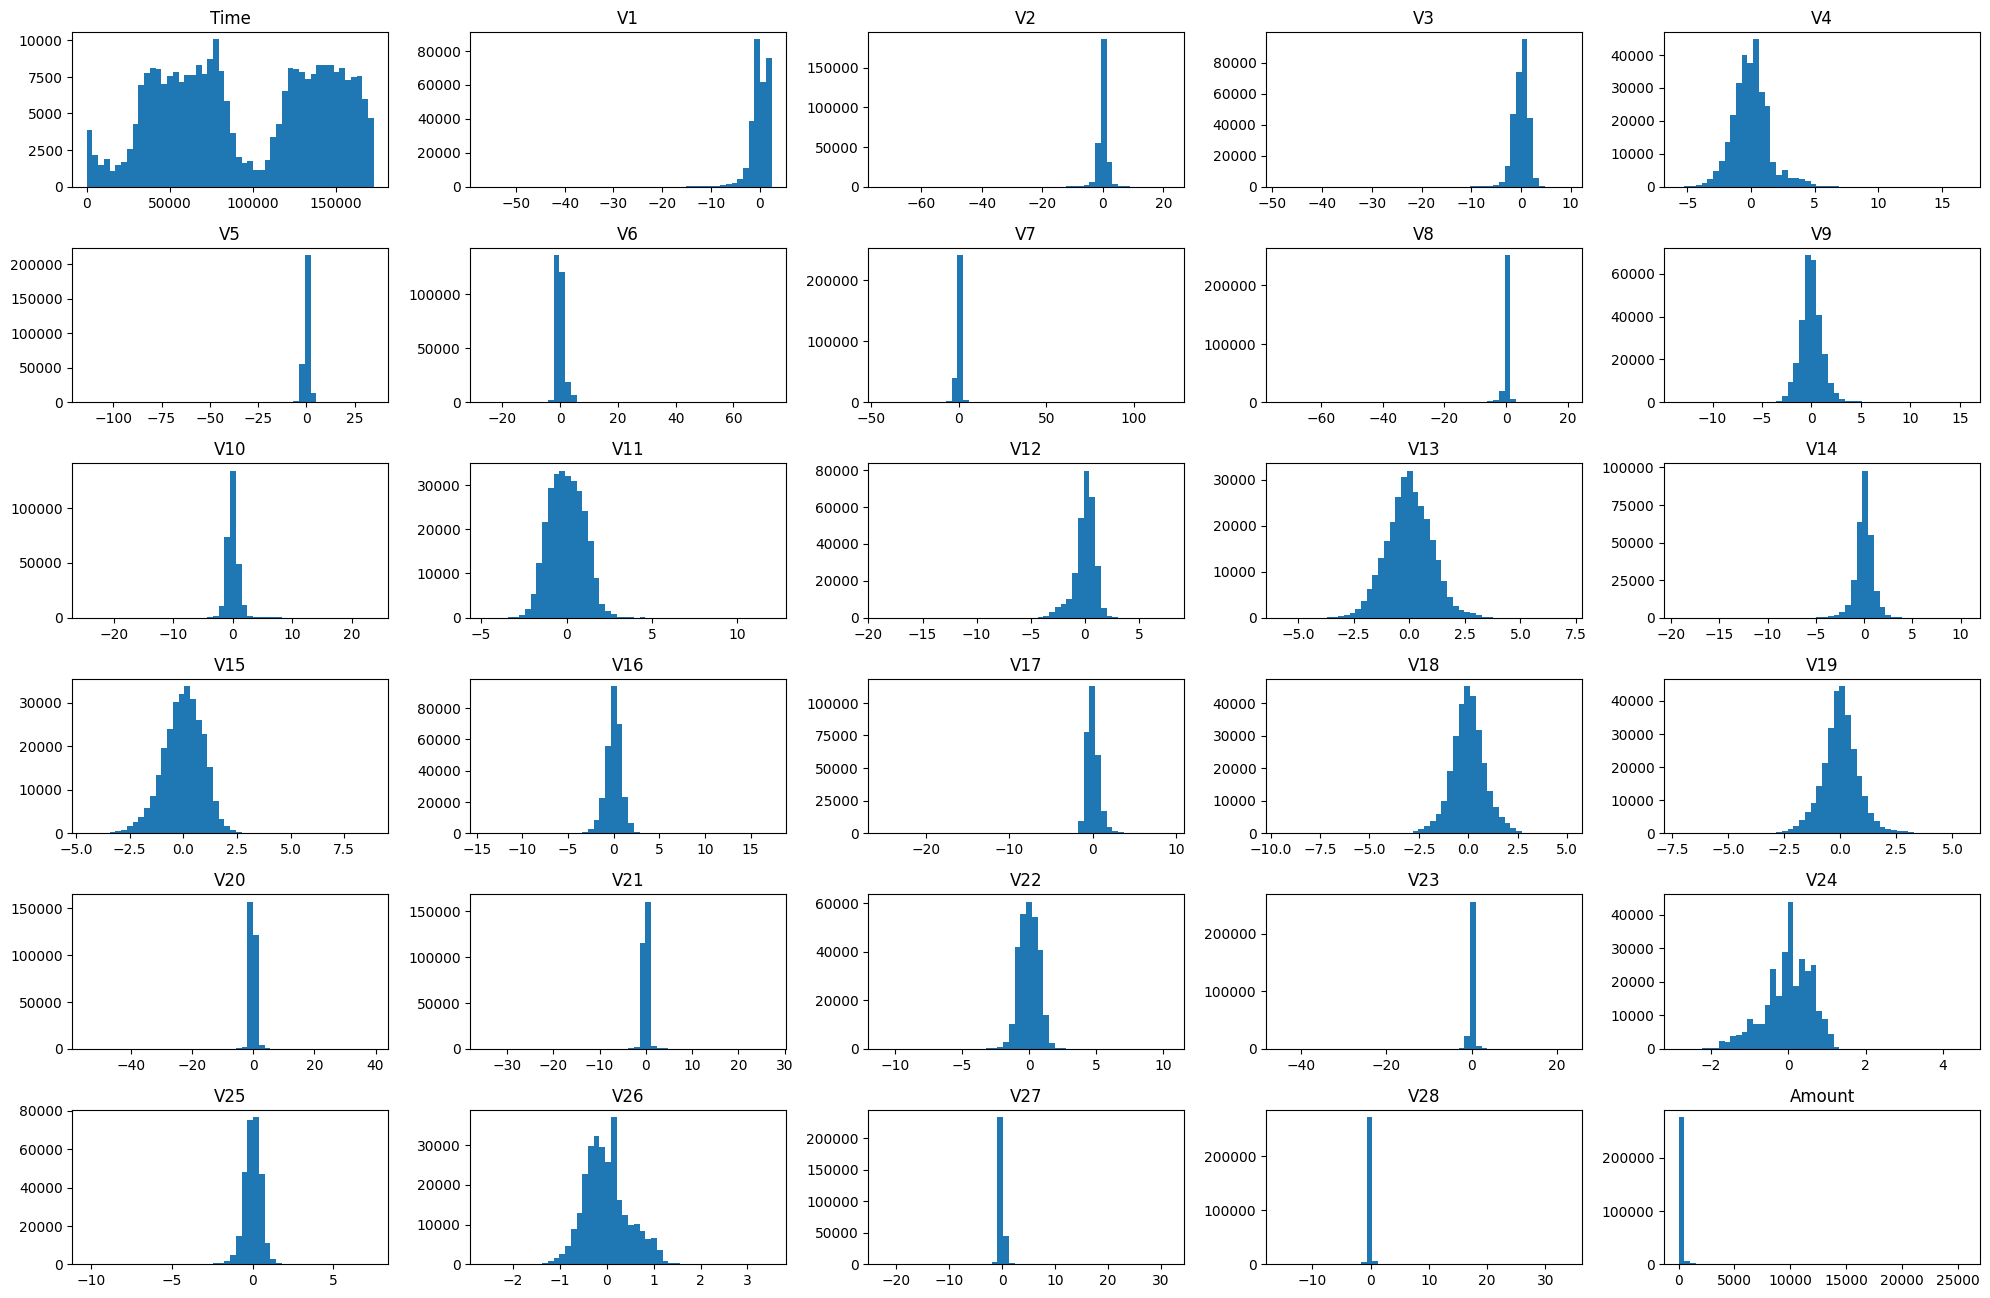

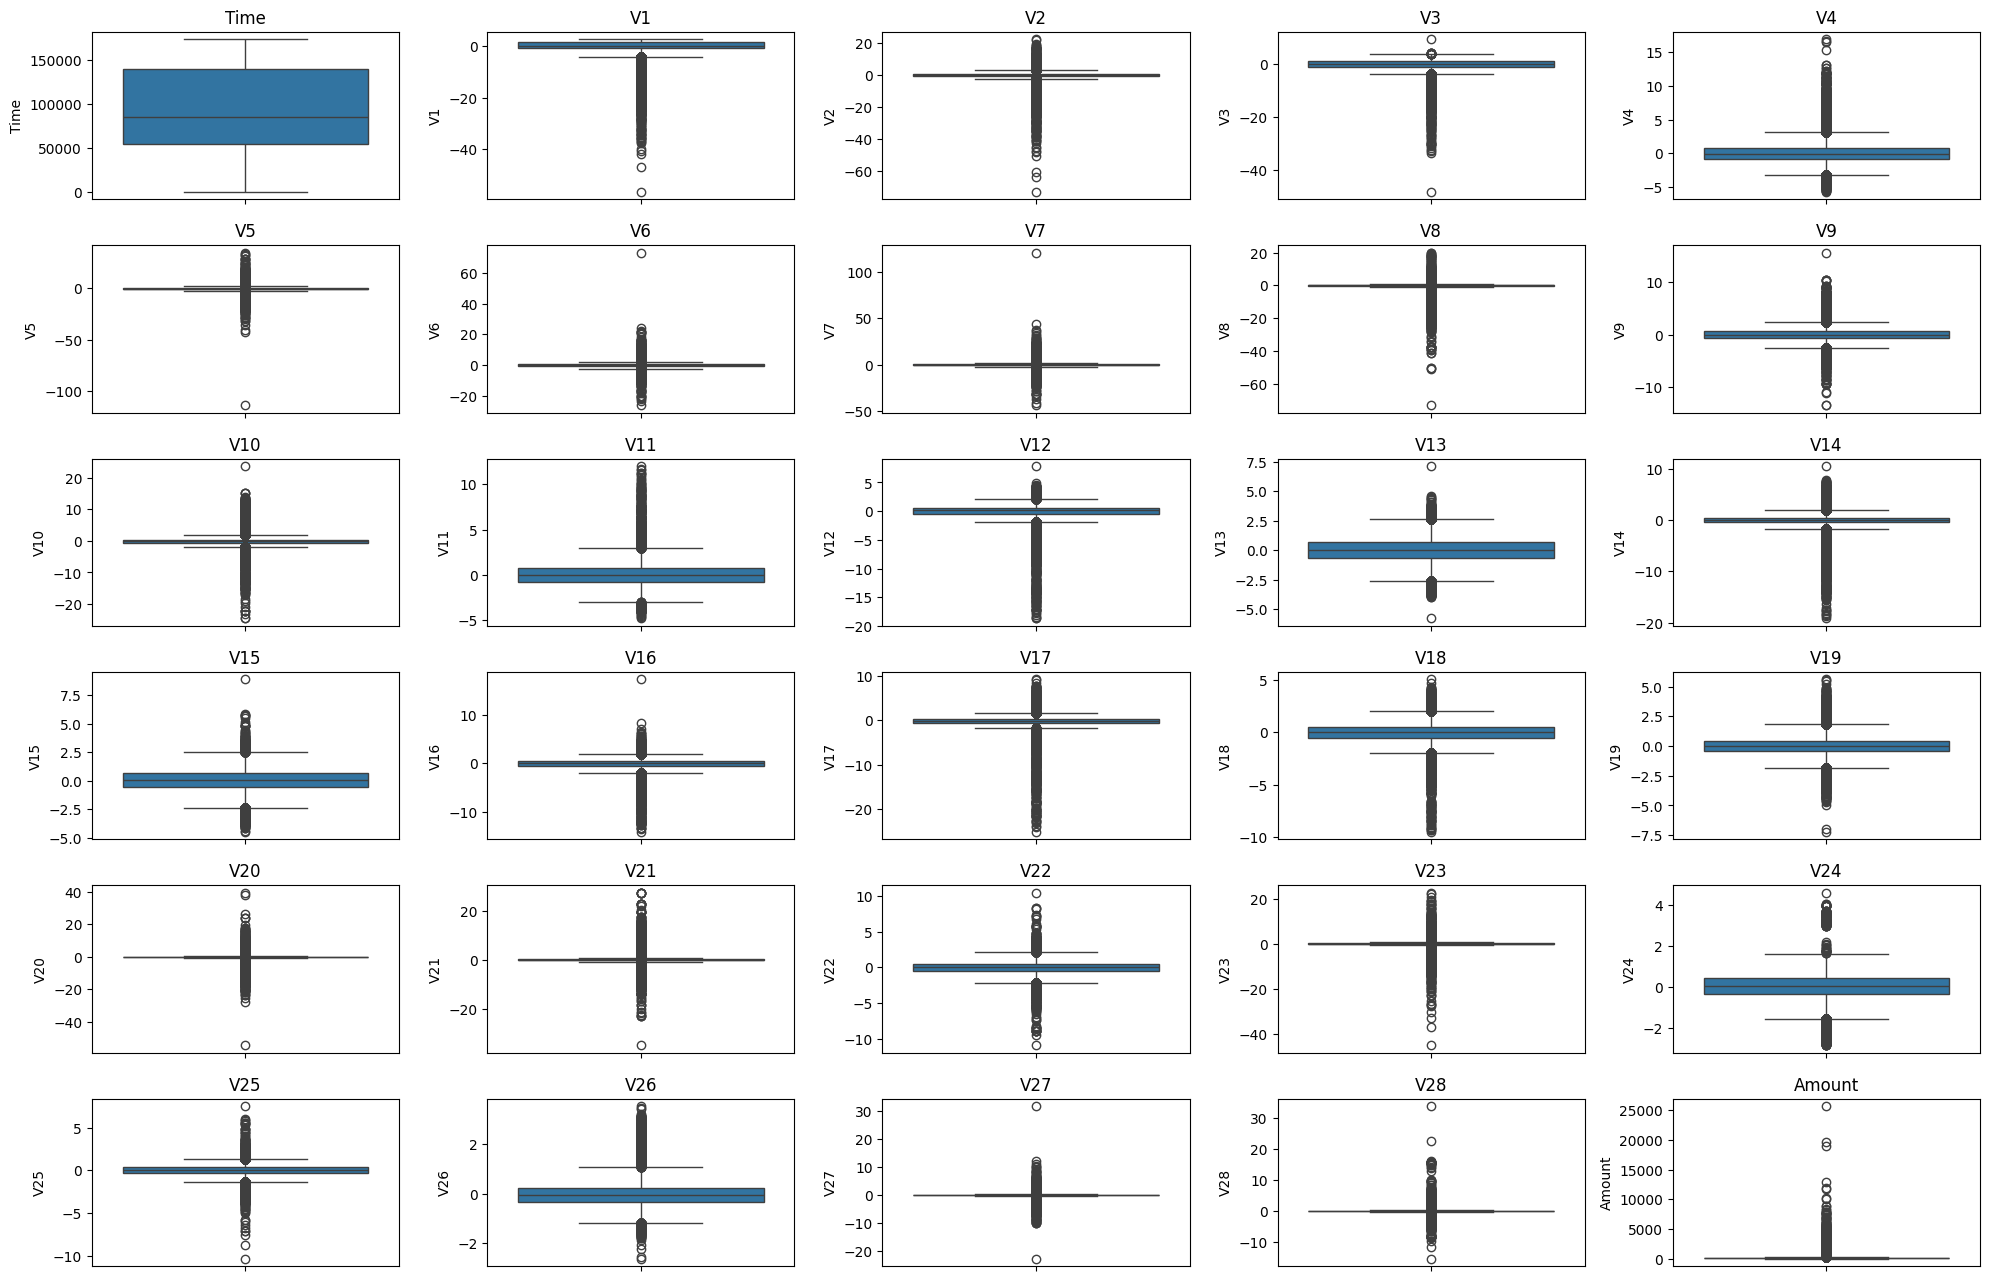

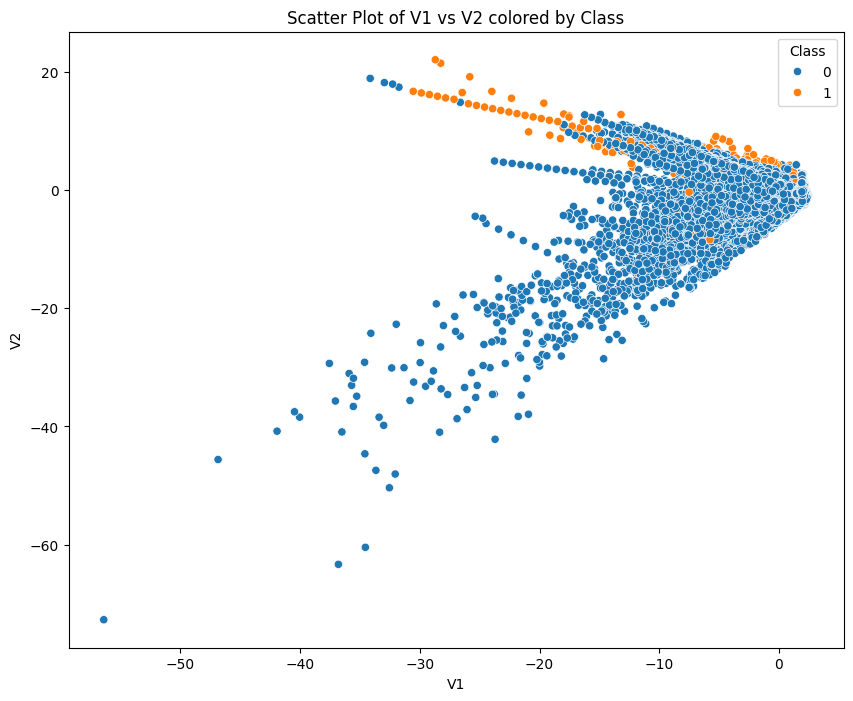

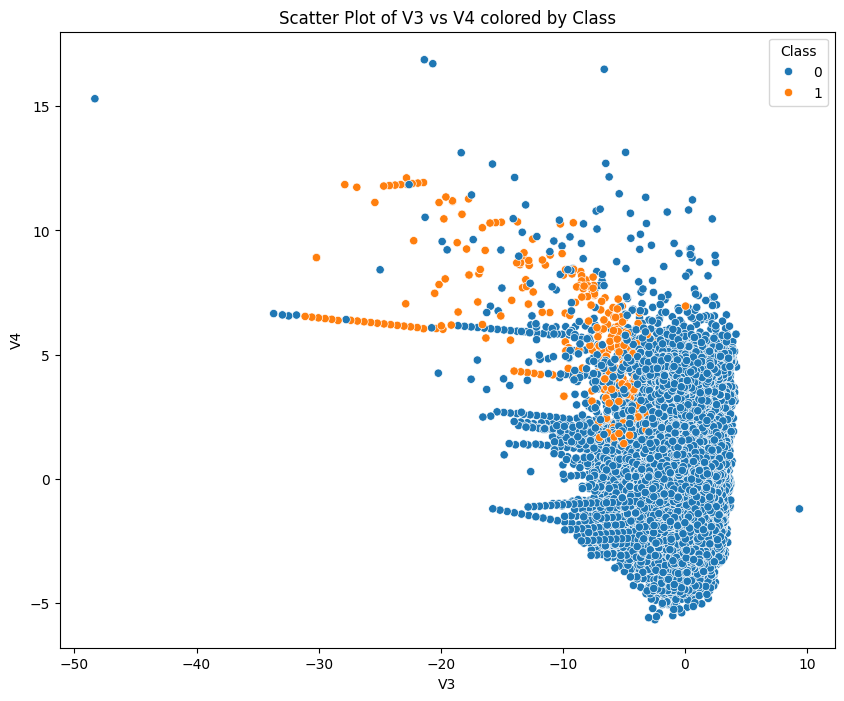

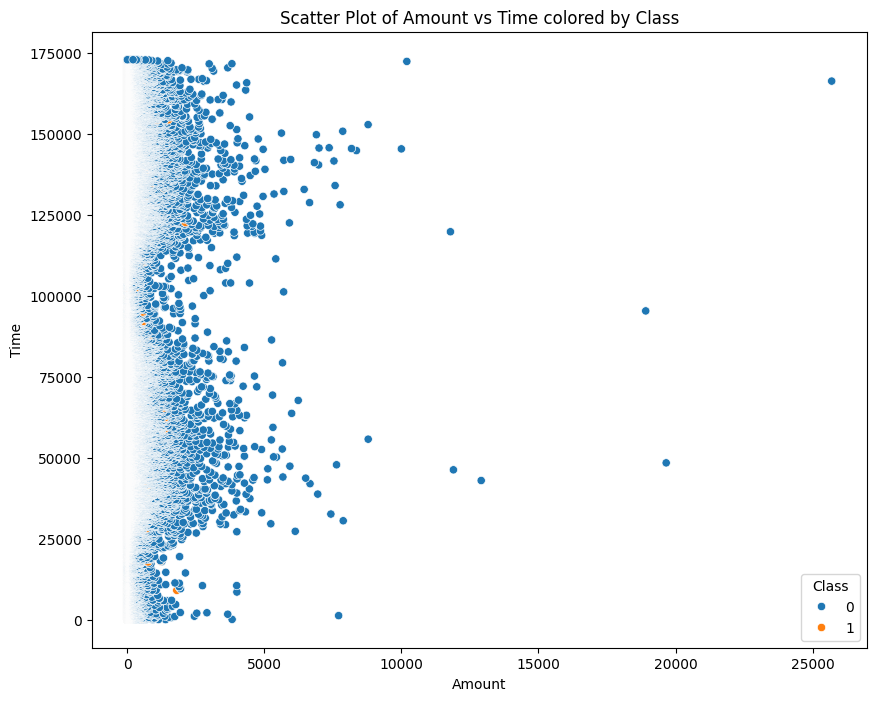

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=['number']).drop('Class', axis=1).columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(7, 5, i + 1)
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.tight_layout()
plt.show()
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(7, 5, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 8))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df)
plt.title('Scatter Plot of V1 vs V2 colored by Class')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='V3', y='V4', hue='Class', data=df)
plt.title('Scatter Plot of V3 vs V4 colored by Class')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Amount', y='Time', hue='Class', data=df)
plt.title('Scatter Plot of Amount vs Time colored by Class')
plt.show()